# meduza

In [1]:
from string import punctuation
from collections import Counter
import datetime
import matplotlib.pyplot as plt

In [2]:
import sys

In [3]:
sys.path.append('C:\\projects\\datascience\\proj_news_viz\\nlp\\experiments\\exp-001_Prepare_csv_for_EDA\\scripts')

In [4]:
from reader import CSVCorpusReader

In [5]:
# Создадим объект чтения корпуса
data = CSVCorpusReader('../../../data/interim')

In [6]:
# Новостные источники
data.categories()

['gazeta', 'interfax', 'iz', 'meduza', 'ria', 'rt', 'tass']

In [7]:
# Имеющиеся файлы в корпусе
data.fileids()

['gazeta/gazeta.csv',
 'interfax/interfax.csv',
 'iz/iz.csv',
 'meduza/meduza.csv',
 'ria/ria.csv',
 'rt/rt.csv',
 'tass/tass.csv']

In [9]:
# Проверим размер нашего сета, который будем обрабатывать
list(data.sizes(None, ['meduza']))

[(FileSystemPathPointer('C:\\projects\\datascience\\proj_news_viz\\nlp\\data\\interim\\meduza\\meduza.csv'),
  304624500)]

## Общий предварительный анализ

In [10]:
# Предварительный анализ всех файлов из каталога новостного источника
data.describe(None, 'meduza')

{'Количество файлов': 1,
 'Количество источников новостей': 1,
 'Количество обработанных новостей': 71807,
 'Количество предложений': 916717,
 'Количество слов': 27118968,
 'Количество токенов (словарь)': 502263,
 'Коэффициент лексического разнообразия (lexical diversity)': 53.99356114227009,
 'Среднее количество новостей по отношению к файлам': 71807.0,
 'Среднее количество предложений в новостях': 12.766401604300416,
 'Начальная дата в обработке': '2014-09-12 09:04:00',
 'Конечная дата в обработке': '2019-08-07 05:28:00',
 'Количество повторяющихся новостей': 1382,
 'Количество пустных новостных элементов': 1372,
 'Время обработки в секундах': 577.3793351650238}

## EDA

In [11]:
list_data = list(data.docs(None, 'meduza'))

In [12]:
# Так выглядет датасет RT
list_data[:5]

[OrderedDict([('date', '2019-08-06 14:15:00'),
              ('url',
               'https://meduza.io/feature/2019/08/06/matros-razgovarival-v-kazarme-po-videosvyazi'),
              ('edition', '-'),
              ('topics', ''),
              ('authors', ''),
              ('title', 'Матрос разговаривал в\xa0казарме по\xa0видеосвязи'),
              ('text',
               'С\xa0марта 2019 года российским военным запрещено пользоваться смартфонами и\xa0публиковать в\xa0интернете фотографии со\xa0службы. Соответствующие поправки к\xa0закону «О\xa0статусе военнослужащих» правительство подготовило в\xa0сентябре 2018 года, а\xa0Госдума и\xa0Совет Федерации одобрили их\xa0в\xa0феврале 2019-го. В\xa0марте закон подписал президент России Владимир Путин, и\xa017\xa0марта онnвступилnв\xa0силу. Российских военных сразу\xa0же начали наказывать за\xa0найденные у\xa0них смартфоны и\xa0фото в\xa0социальных сетях: обычно им\xa0дают от\xa0пяти до\xa015 суток ареста, выяснила «Медуза», изучив решени

In [0]:
# Можно в пандас загрузить и посмотреть

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(list_data)

In [15]:
df.head()

,date,url,edition,topics,authors,title,text,reposts_fb,reposts_vk,reposts_ok,reposts_twi,reposts_lj,reposts_tg,likes,views,comm_count,None
0,2019-08-06 14:15:00,https://meduza.io/feature/2019/08/06/matros-ra...,-,,,Матрос разговаривал в казарме по видеосвязи,С марта 2019 года российским военным запрещено...,-,-,-,-,-,-,-,-,-,[]
1,2019-08-06 14:20:00,https://meduza.io/news/2019/08/06/umerla-feshn...,-,,,Умерла фэшн-директор ЦУМа Алла Вербер,"Умерла фэшн-директор московского ЦУМа, вице-пр...",-,-,-,-,-,-,-,-,-,[]
2,2019-08-06 14:10:00,https://meduza.io/feature/2019/08/06/sama-eta-...,-,,,Сама эта мысль казалась дурацкой: роботы-пчелы...,13 августа в издательстве «Эксмо» выходит книг...,-,-,-,-,-,-,-,-,-,[]
3,2019-08-06 14:35:00,https://meduza.io/news/2019/08/06/u-zaderzhann...,-,,,У задержанных на акции за свободные выборы 3 а...,"Некоторые участникиnакции 3 августаn, у которы...",-,-,-,-,-,-,-,-,-,[]
4,2019-08-06 15:00:00,https://meduza.io/feature/2019/08/06/pochemu-v...,-,,,Почему ваш товар плохо продается в интернете?,"Интернет-покупатели становятся все капризнее, ...",-,-,-,-,-,-,-,-,-,[]


### Обработка словаря

In [16]:
# Соберем токены
tokens = data.gettokens

In [17]:
punctuation = list(punctuation)

In [18]:
punctuation += ['«','»','—', 'n','»,','».', '–', '...']

In [19]:
garbage_words = ['nранее', 'nв', 'nпо', 'nтакже','u','n—', 'nn']

In [20]:
tokens = {item:tokens[item] for item in tokens if item not in punctuation}

In [21]:
tokens = {item:tokens[item] for item in tokens if item not in garbage_words}

In [22]:
stopwords_01 = open('../../../data/another/stopwords.txt', 'r', encoding='UTF-8')
stopwords_01 = stopwords_01.read().split('\n')
stopwords_02 = open('../../../data/another/stopwords_02.txt', 'r', encoding='UTF-8')
stopwords_02 = stopwords_02.read().split('\n')

In [23]:
stopwords = stopwords_01 + stopwords_02

In [24]:
tokens_without_stopwords = {item:tokens[item] for item in tokens if item not in stopwords}

### Аналитика по словам

#### Топ-20 слов без удаления стоп-слов

In [25]:
Counter(tokens).most_common(20)

[('в', 941958),
 ('и', 547653),
 ('на', 380631),
 ('что', 282945),
 ('не', 281658),
 ('с', 246796),
 ('по', 194597),
 ('о', 115383),
 ('из', 115310),
 ('это', 108190),
 ('как', 104513),
 ('а', 103412),
 ('он', 95932),
 ('к', 95481),
 ('за', 90187),
 ('его', 86492),
 ('но', 84367),
 ('года', 79526),
 ('я', 76064),
 ('у', 74929)]

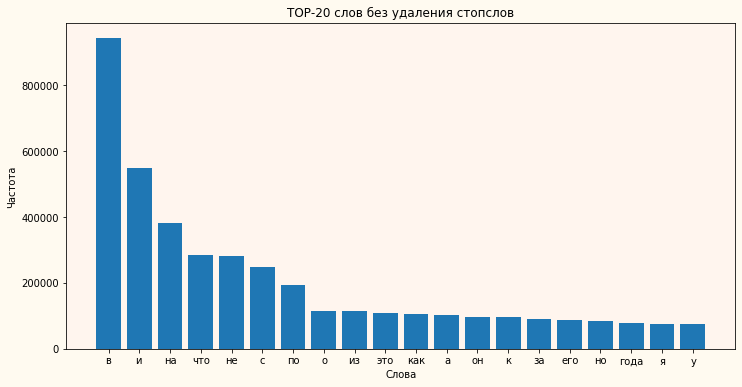

In [26]:
x = dict(Counter(tokens).most_common(20)).keys()
y = dict(Counter(tokens).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

#### Топ-20 слов после удаления стоп-слов

In [27]:
Counter(tokens_without_stopwords).most_common(20)

[('россии', 51788),
 ('рф', 24051),
 ('сша', 23942),
 ('словам', 22038),
 ('рублей', 20688),
 ('заявил', 20194),
 ('из-за', 18196),
 ('2015', 16385),
 ('2016', 16334),
 ('данным', 16152),
 ('компании', 15971),
 ('людей', 15044),
 ('власти', 14472),
 ('например', 14218),
 ('президента', 14177),
 ('числе', 13784),
 ('2014', 13078),
 ('“', 12941),
 ('„', 12602),
 ('человека', 12368)]

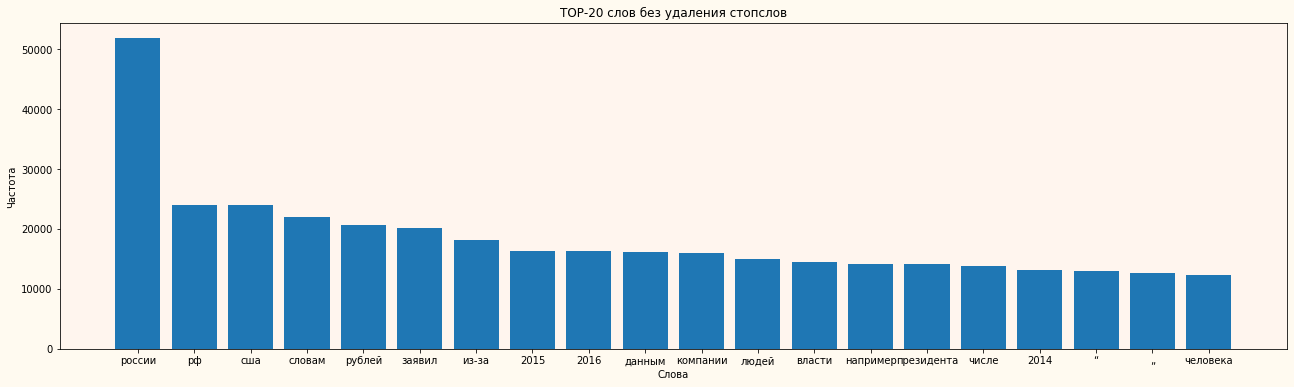

In [28]:
x = dict(Counter(tokens_without_stopwords).most_common(20)).keys()
y = dict(Counter(tokens_without_stopwords).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(22)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

## Рубрики в разрезе новостей

### Количество рубрик

In [29]:
list_topics = list(data.listcolumns(None, 'meduza', 'topics'))

In [30]:
len(set(list_topics))

1

### Рубрики в разрезе количества новостей

In [31]:
Counter(list_topics).most_common(40)

[('', 71807)]

## Распределение количества новостей по месяцам

In [32]:
list_dates = list(data.listcolumns(None, 'meduza', 'date'))

In [33]:
def getMonthDate(date):
  """
  Возвращает дату в формате ММ-ГГГГ
  """
  date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
  return '-'.join(['0' + str(date.month) if date.month<10 else str(date.month), str(date.year)])

In [34]:
# Подсчет количества новостей в разрезе месяца и года
list_dates = [getMonthDate(x) for x in list_dates]

In [35]:
month_year = Counter(list_dates)

In [36]:
len(month_year)

60

In [38]:
month_year.most_common(10)

[('04-2016', 1440),
 ('03-2017', 1429),
 ('03-2016', 1425),
 ('07-2016', 1418),
 ('08-2016', 1404),
 ('11-2016', 1399),
 ('04-2017', 1390),
 ('12-2015', 1379),
 ('05-2016', 1373),
 ('07-2019', 1356)]

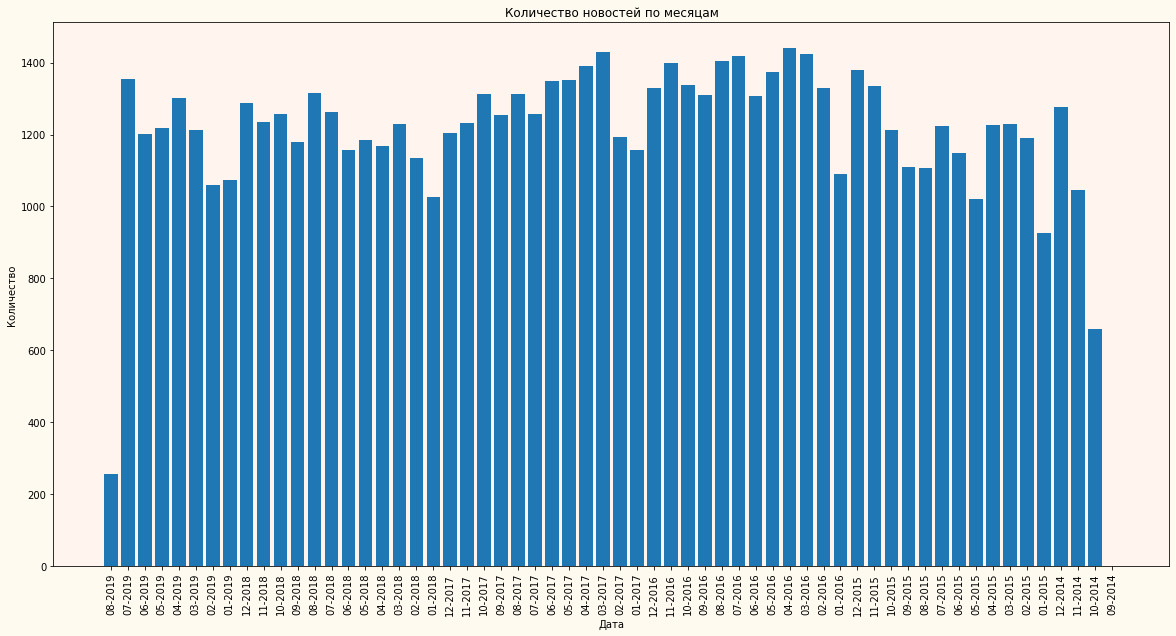

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x = month_year.keys(),
        height = month_year.values())
plt.xticks(rotation='vertical')
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

ax.set_title('Количество новостей по месяцам')
ax.set_ylabel('Количество')
ax.set_xlabel('Дата')
plt.show()